In [1]:
import networkx as nx
from lib.data_manager import DataManager

data_manager = DataManager()
users_df = data_manager.get_users_df()
tweets_df = data_manager.get_tweets_df()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60419 entries, 0 to 60418
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          60419 non-null  int64 
 1   followers_count  60419 non-null  int64 
 2   following_count  60419 non-null  int64 
 3   tweets_count     60419 non-null  int64 
 4   followers        60419 non-null  object
 5   following        60419 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.8+ MB


In [31]:
import pandas as pd
users_not_following = users_df[users_df['following_count'] == 0]
users_no_followers = users_df[users_df['followers_count'] == 0]

# Finding the intersection
intersection = pd.merge(users_not_following, users_no_followers, on='user_id', how='inner')
print("Isolated users\n", intersection)

Isolated users
           user_id  followers_count_x  following_count_x  tweets_count_x  \
0      1867323613                  0                  0               1   
1     -1362100989                  0                  0               2   
2     -1916287419                  0                  0               1   
3     -1837867706                  0                  0               1   
4     -1929652299                  0                  0               1   
...           ...                ...                ...             ...   
16682 -1393667932                  0                  0               1   
16683 -1637925433                  0                  0               1   
16684 -1711462400                  0                  0               1   
16685 -1460220044                  0                  0               1   
16686 -2107028289                  0                  0               1   

      followers_x following_x  followers_count_y  following_count_y  \
0           

In [3]:
# Create follower-followee graph:
user_graph = nx.DiGraph()

for _, user in users_df.iterrows():
    if not user_graph.has_node(user['user_id']):
        user_graph.add_node(user['user_id'])

for _, user in users_df.iterrows():
    for following_user_id in user['following']:
        user_graph.add_edge(user['user_id'], following_user_id, relation='follows')
    for follower_user_id in user['followers']:
        user_graph.add_edge(follower_user_id, user['user_id'], relation='follows')


In [4]:
print("Nodes:", user_graph.number_of_nodes())
print("Edges:", user_graph.number_of_edges())

Nodes: 60419
Edges: 92607


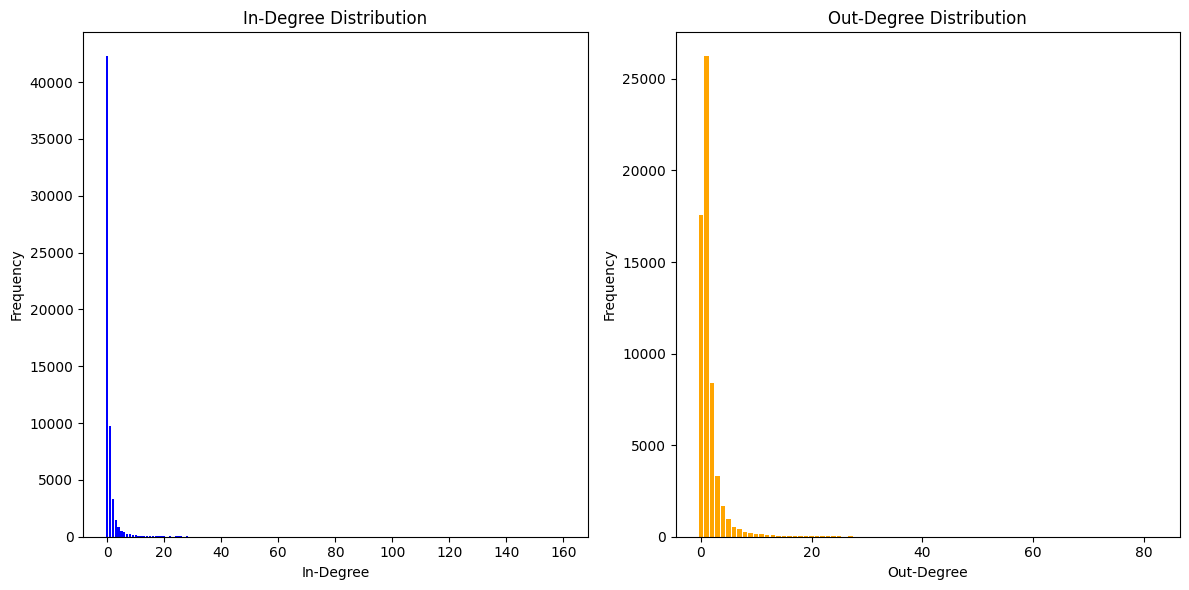

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Calculate in-degree and out-degree distributions
in_degrees = [user_graph.in_degree(n) for n in user_graph.nodes()]
out_degrees = [user_graph.out_degree(n) for n in user_graph.nodes()]

# Calculate distributions as probabilities
in_degree_count = [in_degrees.count(x) for x in set(in_degrees)]
out_degree_count = [out_degrees.count(x) for x in set(out_degrees)]

# Visualize the in-degree distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(in_degree_count)), in_degree_count, color='blue')
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution")

# Visualize the out-degree distribution
plt.subplot(1, 2, 2)
plt.bar(range(len(out_degree_count)), out_degree_count, color='orange')
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution")

# Show the plots
plt.tight_layout()
plt.show()


In [17]:
# Compute In-Degree Centrality (users with many followers)
in_degree_centrality = nx.in_degree_centrality(user_graph)
sorted_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 Nodes by In-Degree Centrality:")
for i, (node, value) in enumerate(sorted_in_degree[:10], start=1):
    followers_count = users_df.loc[users_df['user_id'] == node, 'followers_count'].iloc[0]
    print(f"{i}. Node {node}: {value:.2f}, followers count: {followers_count}")

# Compute Out-Degree Centrality (users who follow many people - power users?)
out_degree_centrality = nx.out_degree_centrality(user_graph)
sorted_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Nodes by Out-Degree Centrality:")
for i, (node, value) in enumerate(sorted_out_degree[:10], start=1):
    following_count = users_df.loc[users_df['user_id'] == node, 'following_count'].iloc[0]
    print(f"{i}. Node {node}: {value:.3f}, , following count: {following_count}")

# # Compute Betweenness Centrality
# betweenness_centrality = nx.betweenness_centrality(user_graph)
# sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
# print("\nTop 10 Nodes by Betweenness Centrality:")
# for i, (node, value) in enumerate(sorted_betweenness[:10], start=1):
#     print(f"{i}. Node {node}: {value:.2f}")

# Compute Closeness Centrality (Measures the mean distance from a vertex to all others. -> the lower the more important the node)
# TODO: say that there are 2 definitions, in the definition of networkx, the formula i s... => higher values indicate higher centrality
closeness_centrality = nx.closeness_centrality(user_graph)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Nodes by Closeness Centrality:")
for i, (node, value) in enumerate(sorted_closeness[:10], start=1):
    print(f"{i}. Node {node}: {value:.2f}")

Top 10 Nodes by In-Degree Centrality:
1. Node 5402612: 0.07, followers count: 3971
2. Node 428333: 0.04, followers count: 2516
3. Node 380648579: 0.03, followers count: 1802
4. Node 742143: 0.03, followers count: 1636
5. Node 19038934: 0.02, followers count: 1214
6. Node 64643056: 0.02, followers count: 1157
7. Node 6433472: 0.02, followers count: 1093
8. Node 87416722: 0.01, followers count: 869
9. Node 51241574: 0.01, followers count: 825
10. Node 2097571: 0.01, followers count: 772

Top 10 Nodes by Out-Degree Centrality:
1. Node 179732982: 0.004, , following count: 231
2. Node 66951419: 0.004, , following count: 222
3. Node 177584156: 0.004, , following count: 216
4. Node 18981319: 0.003, , following count: 156
5. Node 27917781: 0.002, , following count: 151
6. Node 27671624: 0.002, , following count: 145
7. Node 231094495: 0.002, , following count: 135
8. Node 16834659: 0.002, , following count: 110
9. Node 35051304: 0.002, , following count: 100
10. Node 18220818: 0.002, , followi

In [ ]:
diameter = nx.diameter(user_graph.to_undirected()) if nx.is_connected(user_graph.to_undirected()) else float('inf')
print('Diameter', diameter, '\n')
# A disconnected graph has infinite diameter (West 2000, p. 71).

density = nx.density(user_graph)
print('Density', density, '\n') 

In [40]:
# weakly
weakly_connected_components = list(nx.weakly_connected_components(user_graph))
print("Number of weakly connected components:", len(weakly_connected_components))
components_size = [len(component) for component in weakly_connected_components]
components_size = sorted(components_size, reverse=True)
print("Size of weakly connected components:", components_size)
no_isolated_components=[component for component in weakly_connected_components if len(component) > 1]
print("Number of weakly connected components excl. isolated:", len(no_isolated_components), '\n')

# strongly
strongly_connected_components = list(nx.strongly_connected_components(user_graph))
print("Number of strongly connected components:", len(strongly_connected_components))
components_size = [len(component) for component in strongly_connected_components]
components_size = sorted(components_size, reverse=True)
print("Size of strongly connected components:", components_size)
no_isolated_components=[component for component in strongly_connected_components if len(component) > 1]
print("Number of strongly connected components excl. isolated:", len(no_isolated_components), '\n')


Number of weakly connected components: 17568
Size of weakly connected components: [41322, 99, 47, 21, 18, 15, 13, 13, 12, 12, 12, 11, 10, 10, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [24]:
import networkx as nx

# Assuming user_graph is your initial directed graph
# Convert to undirected and remove isolated nodes
user_graph_undirected = user_graph.to_undirected()
isolated_nodes = list(nx.isolates(user_graph_undirected))
user_graph_no_isolated = user_graph_undirected.copy()
user_graph_no_isolated.remove_nodes_from(isolated_nodes)

# Find connected components
connected_components = list(nx.connected_components(user_graph_no_isolated))

# Compute the diameter for each component if it exists
diameters = []
for component in connected_components:
    subgraph = user_graph_no_isolated.subgraph(component)
    if len(subgraph) > 1:  # Only compute diameter for components with more than one node
        diameters.append(nx.diameter(subgraph))

# Determine the overall diameter
if diameters:
    diameter = max(diameters)
else:
    diameter = float('inf')

print('Diameter:', diameter, '\n')

KeyboardInterrupt: 

In [ ]:
# Compute the average clustering coefficient for the directed graph
average_clustering = nx.average_clustering(user_graph.to_undirected())  # Converting to undirected for clustering
print('Average Clustering Coefficient:', average_clustering)

# Compute the clustering coefficient for each node
clustering_coefficients = nx.clustering(user_graph.to_undirected())  # Converting to undirected for per-node clustering
print('Clustering Coefficients for each node:', clustering_coefficients)

In [ ]:
def get_statistics(G):
    # Calculate metrics and display results
    print("Number of vertices:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())
    print("In-degree distribution:", dict(G.in_degree()))
    print("Out-degree distribution:", dict(G.out_degree()))
    print("Centrality indices:", nx.degree_centrality(G))
    print("Clustering coefficient:", nx.clustering(G.to_undirected()))
    print("Network diameter:", nx.diameter(G.to_undirected()) if nx.is_connected(G.to_undirected()) else float('inf'))
    print("Density:", nx.density(G))
    connected_components = list(nx.weakly_connected_components(G))
    print("Number of connected components:", len(connected_components))
    print("Size of connected components:", [len(component) for component in connected_components])